<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Randomforest_customer_data__rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the uploaded dataset
df  = pd.read_csv('/content/drive/My Drive/randomforest/customer_data.csv')


# Display basic information and the first few rows of the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


(None,
    label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
 0      1  54982665      5  1245.5      3   77000.0      2     15      5   
 1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
 2      0  58990862      7  1298.0      1  110000.0      2     11     -1   
 3      1  58995168      7  1335.5      1  151000.0      2     11      5   
 4      0  54987320      7     NaN      2   59000.0      2     11      5   
 
    fea_8  fea_9  fea_10      fea_11  
 0    109      5  151300  244.948974  
 1    100      3  341759  207.173840  
 2    101      5   72001    1.000000  
 3    110      3   60084    1.000000  
 4    108      4  450081  197.403141  )

**Dataset Loaded: **
Customer Data Analysis
Total Records: 1,125

Target Variable: label (likely binary: 0/1)

Features: fea_1 to fea_11

Missing Data: fea_2 has 149 missing values

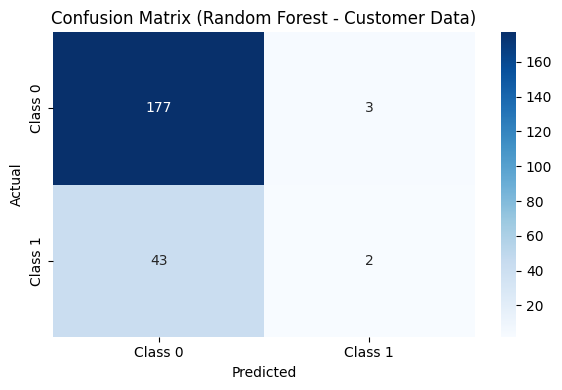

In [6]:
# Step 1: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop 'id' column
if 'id' in df.columns:
    df.drop(columns='id', inplace=True)


# Fill missing values in 'fea_2' with median
imputer = SimpleImputer(strategy='median')
df['fea_2'] = imputer.fit_transform(df[['fea_2']])

# Split into features and target
X = df.drop(columns='label')
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 3: Evaluation - Confusion Matrix
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest - Customer Data)')
plt.tight_layout()
plt.show()


**Random Forest Model Trained & Evaluated**


The confusion matrix gives us insight into how the model performs on the test set:

Top-left (True Negatives): Correctly predicted class 0

Bottom-right (True Positives): Correctly predicted class 1

Top-right (False Positives): Incorrectly predicted class 1

Bottom-left (False Negatives): Missed class 1 cases

Precision, Recall, F1-Score analysis


 Feature Importance


 Hyperparameter Tuning (Randomized Search for faster optimization)

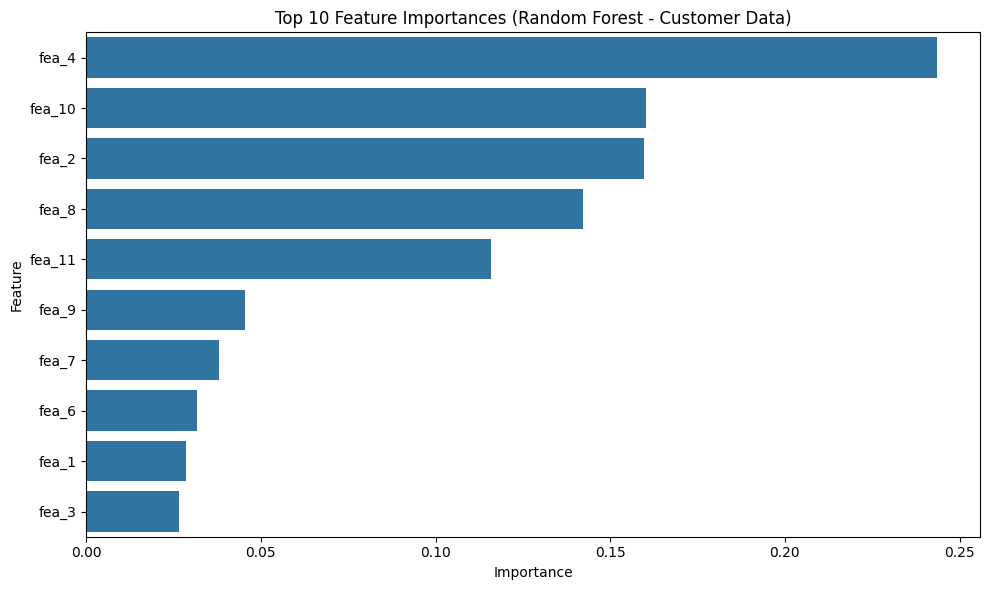

(              precision    recall  f1-score     support
 0              0.804545  0.983333  0.885000  180.000000
 1              0.400000  0.044444  0.080000   45.000000
 accuracy       0.795556  0.795556  0.795556    0.795556
 macro avg      0.602273  0.513889  0.482500  225.000000
 weighted avg   0.723636  0.795556  0.724000  225.000000,
    Feature  Importance
 3    fea_4    0.243647
 9   fea_10    0.160227
 1    fea_2    0.159723
 7    fea_8    0.142343
 10  fea_11    0.115855
 8    fea_9    0.045424
 6    fea_7    0.038020
 5    fea_6    0.031584
 0    fea_1    0.028715
 2    fea_3    0.026569)

In [7]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances (Random Forest - Customer Data)')
plt.tight_layout()
plt.show()

report_df, feature_importance_df.head(10)


** Hyperparameter Tuning via Randomized Search**

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Run the search
random_search.fit(X_train, y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 5 folds for each of 30 candidates, totalling 150 fits


({'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 4,
  'min_samples_split': 5,
  'n_estimators': 136},
 np.float64(0.7393005138420993))